In [ ]:
# keywords

# precision_score, f1_score, apply, np.where, KNeighborsClassifier, recall_score, classification_report
# precision_recall_fscore_support, classification_report, GaussianNB, DecisionTreeClassifier
# LogisticRegression, StratifiedKFold, LogisticRegressionCV, roc_auc, roc_auc_score, roc_curve
# LogisticRegressionCV.predict_proba

# Урок 1. Метрики качества классификации ч.2

Продолжим работу с метриками классификации. В предыдущем задании мы разобрали матрицу ошибок и две основные метрики, которые используются при бинарной классификации.

Сейчас рассмотрим F-меру - совокупную метрику по precision и recall - и более сложную AUC-ROC.

### 2.1
Из задания к предыдущему уроку выберите классификатор, который давал наименьшее значение recall, вычислите для него precision, применив precision_score, и самостоятельно посчитайте F1-меру (расчеты должны присутствовать). Затем проверьте ответ, используя встроенную функцию.

Сравните полученную f1-меру со значением среднего арифметического полноты и точности.

In [1]:
from sklearn.metrics import precision_score, f1_score

In [2]:
### YOUR CODE HERE ###

import pandas as pd
import numpy as np
start_df = pd.read_csv('./data/titanic-train.csv')

In [3]:
start_df = start_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1)

def fill_average_1(pd_obj):
    age = pd_obj['Age']
    sex = pd_obj['Sex']
    if age != age:
        if sex == 'female':
            return 27
        elif sex == 'male':
            return 29
    else:
        return age
    
start_df['Age'] = start_df.apply(fill_average_1, axis = 1)

start_df['Sex'] = np.where(start_df.Sex == 'male', 0, np.where(start_df.Sex == 'female', 1, 255))
start_df['Embarked'] = np.where(start_df.Embarked == 'U', 0,
                  np.where(start_df.Embarked == 'S', 1,
                          np.where(start_df.Embarked == 'C', 2,
                                  np.where(start_df.Embarked == 'Q', 3, np.nan))))
start_df['Embarked'].fillna(start_df['Embarked'].mean(), inplace = True)

In [4]:
start_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,1.0
1,1,1,1,38.0,1,0,71.2833,2.0
2,1,3,1,26.0,0,0,7.9250,1.0
3,1,1,1,35.0,1,0,53.1000,1.0
4,0,3,0,35.0,0,0,8.0500,1.0


In [5]:
from sklearn.model_selection import train_test_split 
X = start_df.drop(['Survived'], axis=1)
y = start_df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, start_df.Survived, test_size=.25,  random_state = 17)

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
KN = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
KN_precision = precision_score(y_test, KN.predict(X_test))

KN_recall = recall_score(y_test, KN.predict(X_test))
print('Метрика precision = %s' %KN_precision)
F1 = (1 + 1**2) * (KN_precision * KN_recall) / (1**2 * KN_precision + KN_recall)
print('Метрика F1 = %s' %F1)
print('Среднее арифметическое recall и precision = %s' %((KN_precision + KN_recall)/2))
print('\nРезультаты classification_report:\n %s' %classification_report(y_test, KN.predict(X_test)))

Метрика precision = 0.6818181818181818
Метрика F1 = 0.5696202531645569
Среднее арифметическое recall и precision = 0.5854743083003953

Результаты classification_report:
               precision    recall  f1-score   support

           0       0.70      0.84      0.76       131
           1       0.68      0.49      0.57        92

   micro avg       0.70      0.70      0.70       223
   macro avg       0.69      0.66      0.67       223
weighted avg       0.69      0.70      0.68       223



#### Метрика F1 не совпадает со средним значением Precision и Recall.
#### Расчетная F1-мера совпала с результатами работы функции classification_report

В библиотеке sklearn есть удобная функция classification_report, возвращающая precision, recall, F-меру и количество экземпляров каждого класса в удобном для чтения формате. Также существует функция precision_recall_fscore_support, возвращающая те же самые метрики, но в форме массива.

### 2.2
Для каждого классификатора из предыдущего урока рассчитайте и выведите следущие импортированные метрики.

In [7]:
from sklearn.metrics import precision_recall_fscore_support, classification_report

In [8]:
### YOUR CODE HERE ###



In [9]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [10]:
GNB = GaussianNB().fit(X_train, y_train)
DTC = DecisionTreeClassifier(random_state=17).fit(X_train, y_train)
LR = LogisticRegression(random_state=17).fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [11]:
precision_recall_fscore_support(y_test, KN.predict(X_test))

(array([0.70063694, 0.68181818]),
 array([0.83969466, 0.48913043]),
 array([0.76388889, 0.56962025]),
 array([131,  92], dtype=int64))

In [12]:
precision_recall_fscore_support(y_test, GNB.predict(X_test))

(array([0.80434783, 0.76470588]),
 array([0.84732824, 0.70652174]),
 array([0.82527881, 0.73446328]),
 array([131,  92], dtype=int64))

In [13]:
precision_recall_fscore_support(y_test, DTC.predict(X_test))

(array([0.8115942 , 0.77647059]),
 array([0.85496183, 0.7173913 ]),
 array([0.83271375, 0.74576271]),
 array([131,  92], dtype=int64))

In [14]:
precision_recall_fscore_support(y_test, LR.predict(X_test))

(array([0.7972028, 0.7875   ]),
 array([0.87022901, 0.68478261]),
 array([0.83211679, 0.73255814]),
 array([131,  92], dtype=int64))

In [15]:
print(classification_report(y_test, KN.predict(X_test)))

              precision    recall  f1-score   support

           0       0.70      0.84      0.76       131
           1       0.68      0.49      0.57        92

   micro avg       0.70      0.70      0.70       223
   macro avg       0.69      0.66      0.67       223
weighted avg       0.69      0.70      0.68       223



In [16]:
print(classification_report(y_test, GNB.predict(X_test)))

              precision    recall  f1-score   support

           0       0.80      0.85      0.83       131
           1       0.76      0.71      0.73        92

   micro avg       0.79      0.79      0.79       223
   macro avg       0.78      0.78      0.78       223
weighted avg       0.79      0.79      0.79       223



In [17]:
print(classification_report(y_test, DTC.predict(X_test)))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       131
           1       0.78      0.72      0.75        92

   micro avg       0.80      0.80      0.80       223
   macro avg       0.79      0.79      0.79       223
weighted avg       0.80      0.80      0.80       223



In [18]:
print(classification_report(y_test, LR.predict(X_test)))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       131
           1       0.79      0.68      0.73        92

   micro avg       0.79      0.79      0.79       223
   macro avg       0.79      0.78      0.78       223
weighted avg       0.79      0.79      0.79       223



Вернемся к классификатору LogisticRegression, который мы обучали в предыдущем задании. Там мы не затрагивали настройку гиперпараметров: сделать это можно с помощью LogisticRegressionCV - перебора параметров по сетке с последующей кросс-валидацией (по сути это аналог GridSearchCV, но со своими параметрами внутри, применимыми только к логистической регрессии). Этот класс создан специально для логистической регрессии, т.к. для нее известны эффективные алгоритмы перебора параметров.

У LogisticRegression есть гиперпараметр C - обратный коэффициент регуляризации. Не вдаваясь в подробное описание по формуле, можно сказать, что C соответствует "сложности" модели: чем больше C, тем более сложные зависимости может восстанавливать модель; если параметр C слишком мал (слишком сильная регуляризация), то модель окажется недообученной, а если наоборот регуляризация слишком слабая (т.е. C принимает большие значения), то скорее всего модель окажется переобученной, потому как модель будет слишком "бояться" ошибиться на обучающей выборке.

### 2.3 

1. Используя StratifiedKFold, разбейте данные для кросс-валидации по 5-ти блокам (не забывайте во всех методах использовать random_state=17).
2. С помощью numpy.logspace разбейте интервал (-1, 2) на 500 значений.
3. С помощью LogisticRegressionCV подберите оптимальный параметр C: установите гперпараметр Cs равным объекту из п.2 (разбиение интервала (-1, 2) отвечает за подбор обратного коэфиициента регуляризации C); cv равным объекту из п.1 (разбиение для кросс-валидации); scoring равным "roc_auc" (отвечает за оптимизацию гиперпараметров на кросс-валидации: метрика, установленная в scoring, контролирует, как оценивать модель при каждом из наборе параметров, т.е. показывает, какая метрика должна быть наилучшей).
4. Обучите полученную модель на тренировочных данных.

In [19]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegressionCV
import numpy as np

In [20]:
### YOUR CODE HERE ###

skf = StratifiedKFold(n_splits=5, random_state = 17)

In [21]:
cs_param = np.logspace(-1, 2, num=500)

In [22]:
LRCV = LogisticRegressionCV(Cs=cs_param, cv=skf, max_iter=1000, scoring='roc_auc', random_state=17).fit(X,y)

In [23]:
LRCV.C_

array([7.51192949])

### 2.4
Используя метод plot из matplotlib.pyplot, выведите график зависимости auc_roc от значения C.

*Примечание: значения по оси x - разбиение с помощью np.logspace из п.2 предыдущего задания, а значения по оси y - среднее значение roc_auc по каждой валидации, т.е. среднее значение из полученных на каждом из 5-ти разбиений при данном параметре C (используйте метод scores_ объекта, который инкапсулирует LogisticRegressionCV).*

In [24]:
import matplotlib.pyplot as plt

In [25]:
### YOUR CODE HERE ###

%matplotlib inline

scores_arr = LRCV.scores_.pop(1)

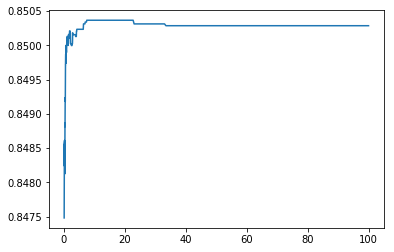

In [26]:
plt.plot(cs_param, scores_arr.sum(axis=0)/5);

### 2.5
С помощью метода C_ того же объекта выведите лучшее значение C. Выведите более конкретную область графика (область ~15 точкам по x), включающую лучшее значение C.

*Примечание: используйте plt.xlim.*

In [27]:
### YOUR CODE HERE ###

(scores_arr.sum(axis=0)/5).max()

0.8503660677020564

In [28]:
np.argwhere(np.array((scores_arr.sum(axis=0)/5))==(scores_arr.sum(axis=0)/5).max())

array([[312],
       [313],
       [314],
       [315],
       [316],
       [317],
       [318],
       [319],
       [320],
       [321],
       [322],
       [323],
       [324],
       [325],
       [326],
       [327],
       [328],
       [329],
       [330],
       [331],
       [332],
       [333],
       [334],
       [335],
       [336],
       [337],
       [338],
       [339],
       [340],
       [341],
       [342],
       [343],
       [344],
       [345],
       [346],
       [347],
       [348],
       [349],
       [350],
       [351],
       [352],
       [353],
       [354],
       [355],
       [356],
       [357],
       [358],
       [359],
       [360],
       [361],
       [362],
       [363],
       [364],
       [365],
       [366],
       [367],
       [368],
       [369],
       [370],
       [371],
       [372],
       [373],
       [374],
       [375],
       [376],
       [377],
       [378],
       [379],
       [380],
       [381],
       [382],
      

In [29]:
# Диапазоны индексов для оси Х графика:
print('Начало: {}'.format(312 - 15))
print('Конец:  {}'.format(392 + 15))

Начало: 297
Конец:  407


(0.85, 0.8505)

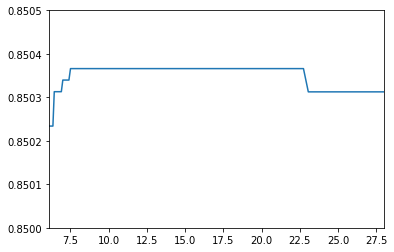

In [30]:
plt.plot(cs_param, scores_arr.sum(axis=0)/5)
plt.xlim(cs_param[297], cs_param[407])
plt.ylim(0.85,0.8505)

### 2.6
С помощью метода predict_proba получите вероятности принадлежности объектов тестовой выборки к классам. Постройте график roc_auc для тестовой выборки и выведите значение auc.

**Пример** построения графика.

In [31]:
from sklearn.metrics import roc_auc_score, roc_curve

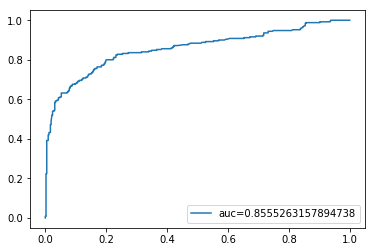

In [32]:
logit_search = LogisticRegressionCV(Cs=cs_param, cv=skf, scoring='roc_auc', n_jobs=-1, random_state=17)
probas = logit_search.fit(X_train, y_train).predict_proba(X_train)
fpr, tpr, _ = roc_curve(y_train, probas[:, 1])
auc = roc_auc_score(y_train, probas[:, 1])
plt.plot(fpr, tpr, label="auc=" + str(auc))
plt.legend(loc=4);

In [33]:
### YOUR CODE HERE ###

